In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [114]:
df = pd.read_csv('df_final_bobot.csv')

In [115]:
df.dtypes

image_name                                         object
Building                                            int64
Clothing                                            int64
Door                                                int64
Dress                                               int64
Footwear                                            int64
Furniture                                           int64
Land vehicle                                        int64
Plant                                               int64
Sports equipment                                    int64
Tree                                                int64
Vehicle                                             int64
Wheel                                               int64
Window                                              int64
Pernah khawatir /pernah tidak makan                 int64
Pengeluaran pangan > 70% pengeluaran                int64
Ada pengeluaran pakaian dalam setahun               int64
Sebagian besar

In [116]:
df = df.rename(columns = {"Sports equipment": "Sports_equipment",
                          "Pernah khawatir /pernah tidak makan":"Pernah_khawatir/pernah_tidak_makan",
                          "Pengeluaran pangan > 70% pengeluaran": "Pengeluaran_pangan>70%_pengeluaran",
                          "Ada pengeluaran pakaian dalam setahun":"Ada_pengeluaran_pakaian_dalam_setahun",
                          "Sebagian besar berlantai tanah":"Sebagian_besar_berlantai_tanah",
                          "Sebagian besar berdinding bambu / kawat / kayu":"Sebagian_besar_berdinding_bambu/kawat/kayu",
                          "Memiliki jamban sendiri":"Memiliki_jamban_sendiri",
                          "Penerangan dari listrik 450VA / bukan listrik":"Penerangan_dari_listrik_450VA/bukan_listrik"})

In [117]:
df.dtypes

image_name                                      object
Building                                         int64
Clothing                                         int64
Door                                             int64
Dress                                            int64
Footwear                                         int64
Furniture                                        int64
Land vehicle                                     int64
Plant                                            int64
Sports_equipment                                 int64
Tree                                             int64
Vehicle                                          int64
Wheel                                            int64
Window                                           int64
Pernah_khawatir/pernah_tidak_makan               int64
Pengeluaran_pangan>70%_pengeluaran               int64
Ada_pengeluaran_pakaian_dalam_setahun            int64
Sebagian_besar_berlantai_tanah                  object
Sebagian_b

In [118]:
df = df.drop(df[df['Sebagian_besar_berlantai_tanah'] == '-'].index)

In [119]:
df['Sebagian_besar_berlantai_tanah'] = df['Sebagian_besar_berlantai_tanah'].astype(int)
df['Sebagian_besar_berdinding_bambu/kawat/kayu'] = df['Sebagian_besar_berdinding_bambu/kawat/kayu'].astype(int)
df['Memiliki_jamban_sendiri'] = df['Memiliki_jamban_sendiri'].astype(int)
df['Penerangan_dari_listrik_450VA/bukan_listrik'] = df['Penerangan_dari_listrik_450VA/bukan_listrik'].astype(int)

In [120]:
df

,image_name,Building,Clothing,Door,Dress,Footwear,Furniture,Land vehicle,Plant,Sports_equipment,...,Pernah_khawatir/pernah_tidak_makan,Pengeluaran_pangan>70%_pengeluaran,Ada_pengeluaran_pakaian_dalam_setahun,Sebagian_besar_berlantai_tanah,Sebagian_besar_berdinding_bambu/kawat/kayu,Memiliki_jamban_sendiri,Penerangan_dari_listrik_450VA/bukan_listrik,bobot,persentase penduduk miskin,label
0,1.jpg,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0.017083,14.687730,1
1,2.jpg,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0.034165,14.687730,1
2,3.jpg,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0.034165,14.687730,1
3,4.jpg,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0.011742,12.371267,1
4,5.jpg,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0.034165,14.687730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,2696.jpg,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.000000,12.027909,0
5396,2697.jpg,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0.155799,9.946336,0
5397,2698.jpg,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.003502,10.666092,0
5398,2699.jpg,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.044896,7.503952,0


In [122]:
df = df.dropna()

In [123]:
features = ['Building', 'Clothing', 'Door', 'Dress', 'Footwear', 'Furniture', 'Land vehicle', 'Plant', 'Sports_equipment', 'Tree', 'Vehicle', 'Wheel', 'Window', 'Pernah_khawatir/pernah_tidak_makan', 'Pengeluaran_pangan>70%_pengeluaran', 'Ada_pengeluaran_pakaian_dalam_setahun', 'Sebagian_besar_berlantai_tanah', 'Sebagian_besar_berdinding_bambu/kawat/kayu', 'Memiliki_jamban_sendiri', 'Penerangan_dari_listrik_450VA/bukan_listrik', 'bobot', 'persentase penduduk miskin', 'label']

In [124]:
df = df[features]

In [125]:
df.head(10)

,Building,Clothing,Door,Dress,Footwear,Furniture,Land vehicle,Plant,Sports_equipment,Tree,...,Pernah_khawatir/pernah_tidak_makan,Pengeluaran_pangan>70%_pengeluaran,Ada_pengeluaran_pakaian_dalam_setahun,Sebagian_besar_berlantai_tanah,Sebagian_besar_berdinding_bambu/kawat/kayu,Memiliki_jamban_sendiri,Penerangan_dari_listrik_450VA/bukan_listrik,bobot,persentase penduduk miskin,label
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0.017083,14.687730,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0.034165,14.687730,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0.034165,14.687730,1
3,1,1,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0.011742,12.371267,1
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0.034165,14.687730,1
5,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,0.034165,14.687730,1
6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0.017083,14.687730,1
7,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0.011742,12.371267,1
8,0,1,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0.034165,14.687730,1
9,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0.017083,14.687730,1


In [126]:
X = df[['Building', 'Clothing', 'Door', 'Dress', 'Footwear', 'Furniture', 'Land vehicle', 'Plant', 'Sports_equipment', 'Tree', 'Vehicle', 'Wheel', 'Window', 'Pernah_khawatir/pernah_tidak_makan', 'Pengeluaran_pangan>70%_pengeluaran', 'Ada_pengeluaran_pakaian_dalam_setahun', 'Sebagian_besar_berlantai_tanah', 'Sebagian_besar_berdinding_bambu/kawat/kayu', 'Memiliki_jamban_sendiri', 'Penerangan_dari_listrik_450VA/bukan_listrik', 'bobot', 'persentase penduduk miskin']].values
X[0:10]

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.71e-02, 1.47e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 3.42e-02, 1.47e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 3.42e-02, 1.47e+01],
       [1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.17e-02,

In [127]:
y = df[['label']].values
y[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [128]:
# y_test.value_counts()
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 534]
 [  1 537]]


In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Logistic Regression

In [131]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
predLR = LR.predict(X_test)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       378
           1       0.75      0.86      0.80       485

    accuracy                           0.76       863
   macro avg       0.77      0.75      0.75       863
weighted avg       0.76      0.76      0.76       863

Confusion matrix, without normalization
[[238 140]
 [ 66 419]]


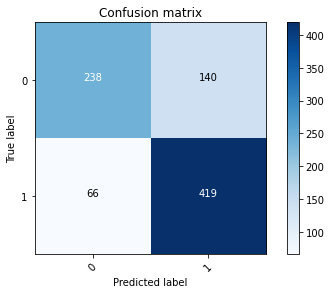

In [133]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [134]:
print("Accuracy: ", metrics.accuracy_score(y_test, predLR))

Accuracy:  0.761297798377752


In [135]:
f1_score(y_test, predLR, average='weighted') 

0.756807431291247

In [136]:
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR2 = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR2 = gsLR2.fit(X_train,y_train)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [137]:
predLR2 = gsLR2.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       378
           1       0.75      0.88      0.81       485

    accuracy                           0.77       863
   macro avg       0.77      0.75      0.76       863
weighted avg       0.77      0.77      0.76       863

Confusion matrix, without normalization
[[237 141]
 [ 60 425]]


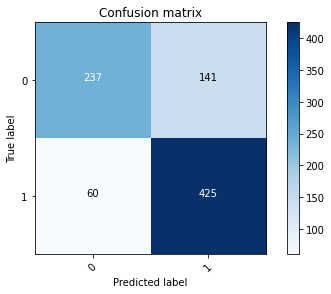

In [138]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [139]:
print("Accuracy: ", metrics.accuracy_score(y_test, predLR2))

Accuracy:  0.7670915411355735


In [140]:
f1_score(y_test, predLR2, average='weighted') 

0.7620920979081888

# Decision Tree

In [141]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree.fit(X_train,y_train)
predTree = decTree.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       378
           1       0.80      0.93      0.86       485

    accuracy                           0.83       863
   macro avg       0.85      0.82      0.83       863
weighted avg       0.84      0.83      0.83       863

Confusion matrix, without normalization
[[268 110]
 [ 34 451]]


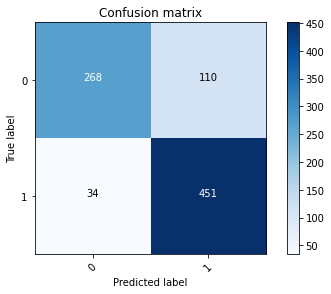

In [142]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [143]:
print("Accuracy: ", metrics.accuracy_score(y_test, predTree))

Accuracy:  0.8331402085747392


In [144]:
f1_score(y_test, predTree, average='weighted') 

0.8298775188053902

# Support Vector Machine

In [145]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
predSVM = clf.predict(X_test)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.57      0.69       378
           1       0.74      0.93      0.82       485

    accuracy                           0.78       863
   macro avg       0.80      0.75      0.76       863
weighted avg       0.80      0.78      0.77       863

Confusion matrix, without normalization
[[216 162]
 [ 32 453]]


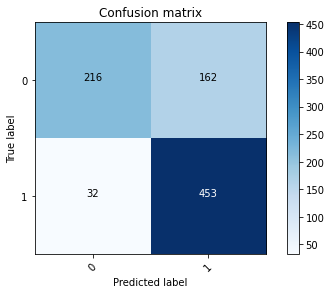

In [146]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [147]:
print("Accuracy: ", metrics.accuracy_score(y_test, predSVM))

Accuracy:  0.7752027809965237


In [148]:
f1_score(y_test, predSVM, average='weighted') 

0.7651446887550234

In [149]:
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                         10.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [150]:
predSVM2 = gsSVC.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       378
           1       0.75      0.84      0.79       485

    accuracy                           0.76       863
   macro avg       0.76      0.74      0.75       863
weighted avg       0.76      0.76      0.75       863

Confusion matrix, without normalization
[[244 134]
 [ 77 408]]


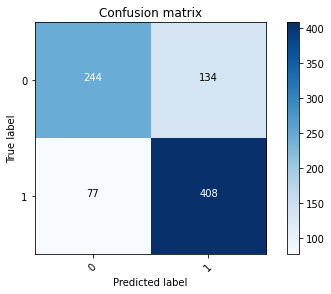

In [151]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [152]:
print("Accuracy: ", metrics.accuracy_score(y_test, predSVM2))

Accuracy:  0.7555040556199305


In [153]:
f1_score(y_test, predSVM2, average='weighted') 

0.752320277865279

# Artificial Neural Network

In [154]:
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
mlp.fit(X_train, y_train)
predANN = mlp.predict(X_test)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.76      0.67      0.71       378
           1       0.77      0.83      0.80       485

    accuracy                           0.76       863
   macro avg       0.76      0.75      0.76       863
weighted avg       0.76      0.76      0.76       863

Confusion matrix, without normalization
[[254 124]
 [ 81 404]]


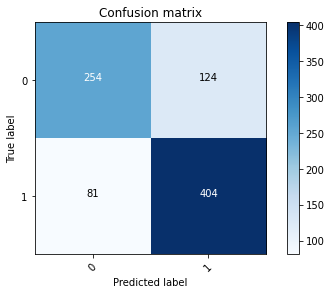

In [155]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [156]:
print("Accuracy: ", metrics.accuracy_score(y_test, predANN))

Accuracy:  0.7624565469293163


In [157]:
f1_score(y_test, predANN, average='weighted') 

0.7603352385631732

In [158]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X_train, y_train)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000], 'random_state': [0],
                         'solver': ['lbfgs']})

In [159]:
predclf = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       378
           1       0.78      0.86      0.81       485

    accuracy                           0.78       863
   macro avg       0.78      0.77      0.77       863
weighted avg       0.78      0.78      0.78       863

Confusion matrix, without normalization
[[258 120]
 [ 70 415]]


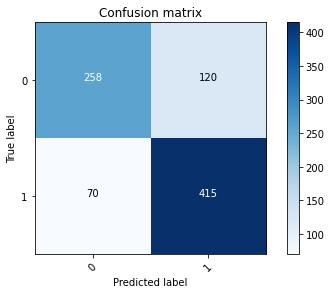

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predclf)
np.set_printoptions(precision=2)

print (classification_report(y_test, predclf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

# Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\Agus Zainal Arifin\AppData\Local\Temp\ipykernel_31316\4229390445.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [162]:
predrf = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       378
           1       0.83      0.85      0.84       485

    accuracy                           0.82       863
   macro avg       0.82      0.81      0.81       863
weighted avg       0.82      0.82      0.82       863

Confusion matrix, without normalization
[[292  86]
 [ 71 414]]


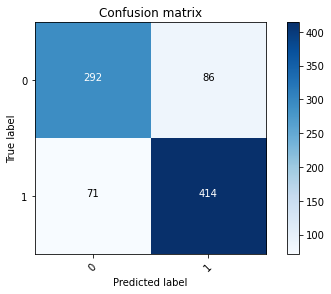

In [163]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [164]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12]
}
gsRF = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid = parameters,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
gsRF.fit(X_train, y_train)

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\envs\nevin\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [320, 330, 340]},
             scoring='accuracy')

In [165]:
predrf2 = gsRF.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.72      0.80       378
           1       0.81      0.93      0.87       485

    accuracy                           0.84       863
   macro avg       0.85      0.83      0.83       863
weighted avg       0.84      0.84      0.84       863

Confusion matrix, without normalization
[[274 104]
 [ 36 449]]


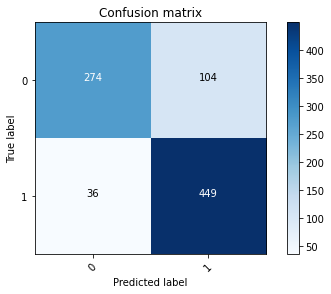

In [166]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [167]:
# [y_test == predrf2]
X_test

array([[1.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 1.56e-01, 9.95e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 6.26e-02, 5.27e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.24e+01],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.00e+00, 9.76e-03, 1.14e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 0.00e+00, 7.05e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 4.49e-02, 7.50e+00]])